In [52]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_csv("Meteorite_Landings.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Preview the first few lines
print("\nFirst Five Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None

First Five Rows:
       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fel

In [53]:
# Drop rows with missing critical data (Latitute, longitude, mass, year)
data_cleaned = data.dropna(subset=['reclat', 'reclong', 'mass (g)', 'year'])

# Convert 'year' to an integer type and 'mass (g)' to float
data_cleaned['year'] = data_cleaned['year'].astype(int)
data_cleaned['mass (g)'] = data_cleaned['mass (g)'].astype(float)

# Check for duplicates and drop them
data_cleaned = data_cleaned.drop_duplicates()

# Verify the cleaned data
print("\nCleaned Dataset Infromation:")
print(data_cleaned.info())
print("\n Sample of Cleaned Data:")
print(data_cleaned.head())


Cleaned Dataset Infromation:
<class 'pandas.core.frame.DataFrame'>
Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  int32  
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 3.1+ MB
None

 Sample of Cleaned Data:
       name   id nametype     recclass  mass (g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH

C:\Users\shatha\AppData\Local\Temp\ipykernel_14840\3950682833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned['year'].astype(int)
C:\Users\shatha\AppData\Local\Temp\ipykernel_14840\3950682833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['mass (g)'] = data_cleaned['mass (g)'].astype(float)


In [56]:
# Bin year into intervals
def bin_year(year):
    if year == 0:
        return 'Unknown'
    elif year < 1900:
        return 'Pre-1900'
    elif 1900 <= year < 2000:
        return '1900-2000'
    else:
        return 'Post-2000'

data_cleaned['year_bin'] = data_cleaned['year'].apply(bin_year)

# Bin mass into categories
def bin_mass(mass):
    if mass == 0:
        return 'Unknown'
    elif mass < 1000:
        return 'Small'
    elif 1000 <= mass < 5000:
        return 'Medium'
    else:
        return 'Large'

data_cleaned['mass_category'] = data_cleaned['mass (g)'].apply(bin_mass)

# Prepare transactions
transactions = data_cleaned[['fall', 'recclass', 'year_bin', 'mass_category']].astype(str).values.tolist()
print(transactions)


[['Fell', 'L5', 'Pre-1900', 'Small'], ['Fell', 'H6', '1900-2000', 'Small'], ['Fell', 'EH4', '1900-2000', 'Large'], ['Fell', 'Acapulcoite', '1900-2000', 'Medium'], ['Fell', 'L6', '1900-2000', 'Small'], ['Fell', 'EH4', '1900-2000', 'Medium'], ['Fell', 'LL3-6', '1900-2000', 'Small'], ['Fell', 'H5', 'Pre-1900', 'Large'], ['Fell', 'L6', '1900-2000', 'Medium'], ['Fell', 'L', '1900-2000', 'Medium'], ['Fell', 'Diogenite-pm', '1900-2000', 'Medium'], ['Fell', 'L6', '1900-2000', 'Large'], ['Fell', 'L6', '1900-2000', 'Small'], ['Fell', 'H4', 'Pre-1900', 'Medium'], ['Fell', 'H', '1900-2000', 'Medium'], ['Fell', 'Iron, IVA', '1900-2000', 'Large'], ['Fell', 'CR2-an', '1900-2000', 'Small'], ['Fell', 'LL5', 'Post-2000', 'Small'], ['Fell', 'CI1', 'Pre-1900', 'Large'], ['Fell', 'L/LL4', 'Pre-1900', 'Medium'], ['Fell', 'L', '1900-2000', 'Small'], ['Fell', 'Eucrite-mmict', 'Post-2000', 'Small'], ['Fell', 'LL5', 'Pre-1900', 'Small'], ['Fell', 'L6', 'Pre-1900', 'Medium'], ['Fell', 'H5', 'Pre-1900', 'Small'],

In [60]:
# Filter data for pre-1900 meteorites
pre_1900_data = data_cleaned[data_cleaned['year_bin'] == 'Pre-1900']


print(pre_1900_data)


pre_1900_transactions = pre_1900_data[['recclass', 'mass_category', 'fall', 'year_bin']].astype(str).values.tolist()

print(pre_1900_transactions)

                   name     id nametype         recclass   mass (g)   fall  \
0                Aachen      1    Valid               L5       21.0   Fell   
7                  Agen    392    Valid               H5    30000.0   Fell   
14             Akbarpur    427    Valid               H4     1800.0   Fell   
19                Alais    448    Valid              CI1     6000.0   Fell   
20             Albareto    453    Valid            L/LL4     2000.0   Fell   
...                 ...    ...      ...              ...        ...    ...   
45662        Yanhuitlan  30349    Valid        Iron, IVA   421000.0  Found   
45663            Yardea  30351    Valid     Iron, IAB-MG     3290.0  Found   
45680       York (iron)  30367    Valid      Iron, IIIAB      835.0  Found   
45684         Youndegin  30374    Valid     Iron, IAB-MG  3800000.0  Found   
45691  Zacatecas (1792)  30381    Valid  Iron, ungrouped  1000000.0  Found   

       year    reclat    reclong             GeoLocation  year_

In [61]:


# Encode transactions
te_pre_1900 = TransactionEncoder()
pre_1900_encoded = te_pre_1900.fit(pre_1900_transactions).transform(pre_1900_transactions)
pre_1900_df = pd.DataFrame(pre_1900_encoded, columns=te_pre_1900.columns_)

# Generate frequent itemsets
pre_1900_itemsets = apriori(pre_1900_df, min_support=0.05, use_colnames=True)

# Generate association rules
pre_1900_rules = association_rules(pre_1900_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(pre_1900_df))

# Sort and display rules
print("Top Association Rules for Pre-1900 Meteorites:")
print(pre_1900_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())


Top Association Rules for Pre-1900 Meteorites:
                  antecedents               consequents   support  confidence  \
124            (Large, Found)   (Pre-1900, Iron, IIIAB)  0.092068    0.298165   
130             (Iron, IIIAB)  (Pre-1900, Large, Found)  0.092068    0.822785   
76              (Iron, IIIAB)            (Large, Found)  0.092068    0.822785   
73             (Large, Found)             (Iron, IIIAB)  0.092068    0.298165   
119  (Pre-1900, Large, Found)             (Iron, IIIAB)  0.092068    0.298165   

         lift  
124  2.664615  
130  2.664615  
76   2.664615  
73   2.664615  
119  2.664615  


c:\Users\shatha\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [64]:
# Filter data for "Fell" meteorites
fell_data = data_cleaned[data_cleaned['fall'] == 'Fell']

# Recreate transactions for this subset
fell_transactions = fell_data[[ 'recclass','mass_category', 'fall', 'year_bin']].values.tolist()

# Encode transactions
te_fell = TransactionEncoder()
fell_encoded = te_fell.fit(fell_transactions).transform(fell_transactions)
fell_df = pd.DataFrame(fell_encoded, columns=te_fell.columns_)

# Generate frequent itemsets
fell_itemsets = apriori(fell_df, min_support=0.05, use_colnames=True)

# Generate association rules
fell_rules = association_rules(fell_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(fell_encoded))

# Sort and display rules
print("Top Association Rules for Fell Meteorites:")
print(fell_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())


Top Association Rules for Fell Meteorites:
               antecedents            consequents   support  confidence  \
123               (Medium)  (1900-2000, Fell, L6)  0.050704    0.159292   
110  (1900-2000, Fell, L6)               (Medium)  0.050704    0.375000   
114        (1900-2000, L6)         (Fell, Medium)  0.050704    0.375000   
119         (Fell, Medium)        (1900-2000, L6)  0.050704    0.159292   
56         (1900-2000, L6)               (Medium)  0.050704    0.375000   

         lift  
123  1.178097  
110  1.178097  
114  1.178097  
119  1.178097  
56   1.178097  


c:\Users\shatha\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


<Axes: xlabel='year_bin'>

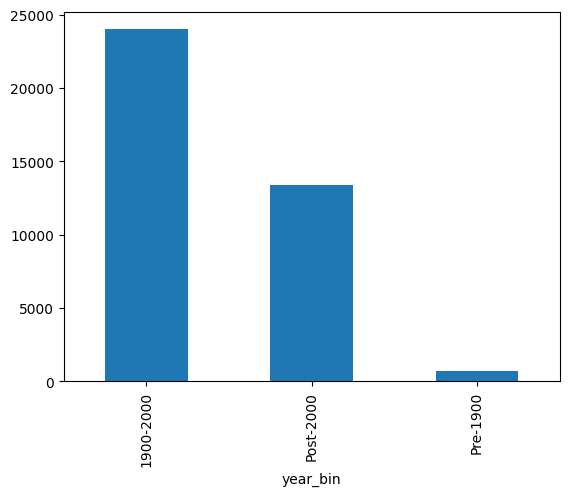

In [22]:
data_cleaned['year_bin'].value_counts().plot(kind='bar')
